In [1]:
#------------------------------------------------EXO: titanic---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_excel(r'C:\Users\elbakkali\Desktop\Datasets_Machine_Learning\titanic3.xls')

In [3]:
titanic.drop(['name', 'ticket', 'cabin','boat', 'body', 'home.dest'], axis= 1, inplace = True)

In [4]:
titanic['sex'].replace(['male', 'female'],[0,1], inplace=True)

In [5]:
#titanic['boat'] = titanic['boat'].fillna(0)

In [6]:
 #!!!!!!!!Très utile: auto feature engineer 'embarked'
titanic['embarked']= titanic['embarked'].astype('category').cat.codes

In [7]:
#d = dict(enumerate(titanic['embarked'].cat.categories))
#print (d)
#titanic['embarked'].cat.categories[0]

In [8]:
titanic.dropna(axis=0, inplace=True)
titanic.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,2.206699,0.408612,0.371292,29.851834,0.503349,0.421053,36.686080,1.540670
std,0.841542,0.491813,0.483382,14.389201,0.912471,0.840052,55.732533,0.816216
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,8.050000,1.000000
50%,2.000000,0.000000,0.000000,28.000000,0.000000,0.000000,15.750000,2.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.000000,35.500000,2.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [9]:
y = titanic['survived']

In [10]:
X= titanic.drop(['survived'], axis = 1)
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(783, 7)
(262, 7)
(783,)
(262,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#y_train = y_train.values.reshape(y_train.shape[0],1)
#y_train.shape
#y_test = y_test.values.reshape(y_test.shape[0],1)
#y_test.shape

In [15]:
param_grid = {'n_neighbors' : np.arange(1,20),
                'metric': ['euclidean', 'manhattan'],
                 'weights' : ['uniform', 'distance'],
                  'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']    
}

In [16]:
kn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [ ]:
kn.fit(X_train, y_train)

In [ ]:
kn.best_score_

In [ ]:
kn.best_params_

In [ ]:
kn_titanic = kn.best_estimator_

In [ ]:
kn_titanic.score(X_train,y_train)

In [ ]:
kn_titanic.score(X_test,y_test)

In [ ]:
#Validation cuvre >> overfitting ou underfitting
from sklearn.model_selection import validation_curve

In [ ]:
param_range= np.arange(1,20)

train_score, val_score = validation_curve(kn_titanic, X_train, y_train, 'n_neighbors' ,param_range , cv=5 )

In [ ]:
plt.plot(param_range, train_score.mean(axis= 1), label='training')
plt.plot(param_range, val_score.mean(axis=1), label='validation', c='r')

In [27]:
#Learning curve
from sklearn.model_selection import learning_curve

N, train_sc, val_sc = learning_curve(kn_titanic, X_train, y_train, train_sizes=np.linspace(0.2,1,5), cv=5)

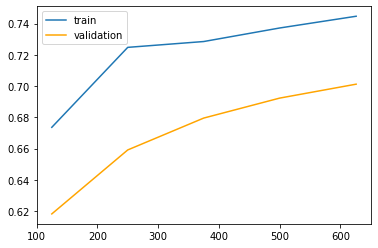

In [28]:
plt.plot(N, train_sc.mean(axis = 1), label = 'train')
plt.plot(N, val_sc.mean(axis= 1), label= 'validation', c='orange')
plt.legend()

#Possibilité d"améliorer le modèle avec plus de données :)

In [29]:
#----------------Neural-Network
from sklearn.neural_network import MLPClassifier

In [30]:
NN = MLPClassifier(solver='lbfgs', alpha=0.006, hidden_layer_sizes=(7, 2), random_state=1)

In [31]:
NN.fit(X_train, y_train)

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.006, hidden_layer_sizes=(7, 2), random_state=1,
              solver='lbfgs')

In [32]:
NN.score(X_train,y_train)

0.8007662835249042

In [33]:
NN.score(X_test,y_test)

0.7786259541984732

In [36]:
#-----------LinearSVC (Support Vector Machine)
from sklearn.svm import LinearSVC 

In [43]:
linear_svm = LinearSVC(max_iter=10000)

In [44]:
linear_svm.fit(X_train,y_train)

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=10000)